Problem Statement:

Refer Telecom Churn Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using a decision tree. Analyze the performance of the model with suitable evaluation measures.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [43]:
data=pd.read_csv("C:\M.sc Data Science clg\DS SEM 2\ML Assignments\Assignment no 5 dt\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
# creating a function which will give us features from the dataset
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("DESCRIPTION OF THE DATA")
    print(dataset.describe())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    
data_feature(data)

SHAPE OF THE DATA: 
(7043, 21)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   o

In [45]:
data.TotalCharges=pd.to_numeric(data.TotalCharges, errors='coerce')
data.TotalCharges.isnull().sum()
# we got 11 missing values in Total Charges columns 

11

In [46]:
# imputinig the missing values using the mode of TotalCharges features
data['TotalCharges'].fillna(value=data['TotalCharges'].mode()[0],inplace=True)
# so here our column values are categorical so we use mode for replacing missing values

In [47]:
# after imputation
data['TotalCharges'].isnull().sum()

0

# EDA

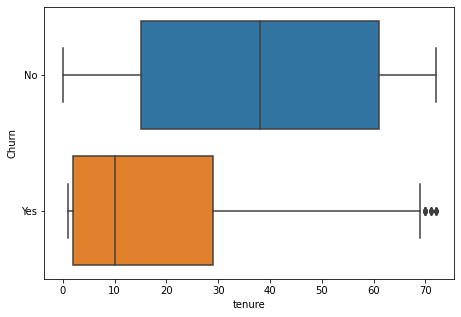

In [48]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'tenure', y = 'Churn', data=data)

plt.show()

- Plot the box plot of all the three column to find the outliers in the columns.In here tenure column in yes column we have outliers

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

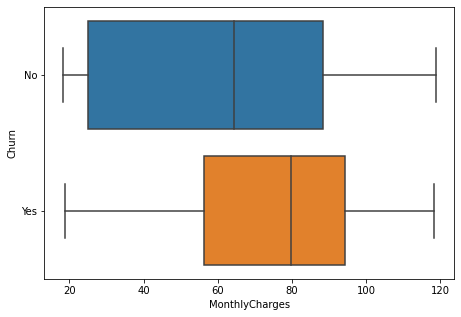

In [49]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,2)
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data=data)


<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

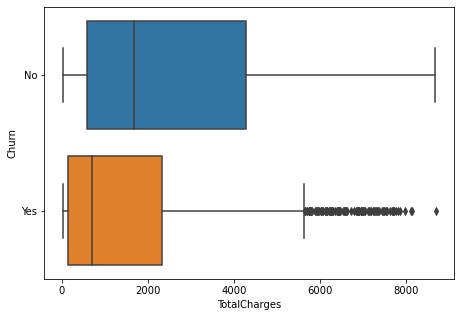

In [50]:
plt.figure(figsize=(25, 5))
plt.subplot(1,3,3)
sns.boxplot(x = 'TotalCharges', y = 'Churn', data=data)

- In totalcharges column the churn yes have outliers

In [51]:
# Converting some binary variables (Yes/No) to 0/1

In [52]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

- In above process we do converting categorical values to numerical in Binary format.

In [53]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [54]:
# For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [55]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)

In [56]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,0,0,0,1,0,0,1,0


In [57]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(data['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
data = pd.concat([data,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(data['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(data['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(data['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(data['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(data['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(data['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
data = pd.concat([data,sm1], axis=1)

In [58]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,1,0,1,0,1,0,1,0,1,0


In [59]:
# Dropping the repeated variables

In [60]:
# We have created dummies for the below variables, so we can drop them
data = data.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [61]:
# Checking for Outliers

In [62]:
# Checking for outliers in the continuous variables
num_telecom  = data[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [63]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom .describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2279.765853
std,24.559481,30.090047,0.368612,2266.762876
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,398.550000
50%,29.000000,70.350000,0.000000,1394.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
99%,72.000000,114.729000,1.000000,8039.256000


In [64]:
data.isnull().sum()

customerID                               0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [65]:
print('No. of Null Records for TotalCharges:',data.TotalCharges.isnull().sum())

No. of Null Records for TotalCharges: 0


# Test-Train Split

In [66]:
# Putting feature variable to X
X = data.drop(['Churn','customerID'], axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [67]:
# Putting response variable to y
y = data['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [68]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


# Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0,0,1,0.754422,0,0,-0.145568,0.350952,1,0,...,1,0,0,1,0,1,0,1,0,1
5792,1,0,0,-0.710751,1,1,1.051796,-0.377982,0,0,...,1,0,0,1,0,1,1,0,0,1
5334,0,1,1,0.673024,1,1,1.437668,1.329872,0,1,...,0,1,0,1,0,1,0,1,0,1
878,0,0,0,1.120716,1,0,0.006794,0.776099,1,0,...,1,0,0,1,0,1,1,0,1,0
6578,0,0,1,-0.914247,1,0,0.298268,-0.701956,1,0,...,1,0,0,1,0,1,1,0,0,1


In [72]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

X_test.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
4880,0,1,0,0.713723,1,0,-1.457203,-0.536601,0,1,...,0,0,0,0,0,0,0,0,0,0
1541,0,0,0,1.609107,1,0,-1.480388,-0.374736,0,1,...,0,0,0,0,0,0,0,0,0,0
1289,0,0,0,1.242814,1,0,0.140938,0.807836,1,0,...,0,1,0,1,0,1,1,0,1,0
5745,0,1,1,1.161415,1,1,-1.336307,-0.369833,0,1,...,0,0,0,0,0,0,0,0,0,0
4873,0,0,0,-1.036345,1,0,-1.498605,-0.944168,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
### Checking the Churn Rate
churn = (sum(data['Churn'])/len(data['Churn'].index))*100
churn

26.536987079369588

- We have almost 27% churn rate

In [74]:
# Dropping highly correlated dummy variables

In [75]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

# Model Building

In [76]:
model = DecisionTreeClassifier()

In [77]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [79]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9977687626774848


In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

,Features,VIF
13,gender_Male,2.02
10,PaymentMethod_Credit card (automatic),1.98
2,Dependents,1.98
17,OnlineSecurity_Yes,1.96
0,SeniorCitizen,1.39


In [86]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['MonthlyCharges', 'TotalCharges', 'PhoneService', 'InternetService_Fiber optic', 'tenure', 'InternetService_No']


In [87]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
877,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,1,1
5792,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1
5334,0,1,1,1,0,1,0,0,0,0,1,0,1,1,1,1,1
878,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0
6578,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,0,1


In [88]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
4880,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
1541,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1289,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0
5745,0,1,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0
4873,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [89]:
# fit the model with the training data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [91]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9064908722109534


In [95]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Partner,2.66
16,StreamingMovies_Yes,2.59
15,StreamingTV_Yes,2.58
3,PaperlessBilling,2.52
13,DeviceProtection_Yes,2.14
10,MultipleLines_Yes,1.99
7,PaymentMethod_Electronic check,1.98
2,Dependents,1.94
12,OnlineBackup_Yes,1.94
14,TechSupport_Yes,1.94


In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)
# Classification report
print(classification_report(y_train, predict_train))

[[3512  115]
 [ 346  957]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3627
           1       0.89      0.73      0.81      1303

    accuracy                           0.91      4930
   macro avg       0.90      0.85      0.87      4930
weighted avg       0.91      0.91      0.90      4930



In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.7344589409056025

In [99]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

0.9682933553901296

# Precision and Recall

In [100]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

0.8927238805970149

In [101]:
recall_score(y_train,predict_train)

0.7344589409056025

In [102]:
 #Making predictions on the test set

In [103]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [0 0 0 ... 0 0 0]


In [104]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[1288  259]
 [ 347  219]]


In [105]:
# Let's check the overall accuracy.
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.7132039753904401

In [106]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))

Train Data Accuracy    :90.65 %
Test Data Accuracy     :71.32 %
